In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv(r"C:\Users\asus 1\Desktop\Fliprobo\Machine learning projects\census_income.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
data.shape

(32560, 15)

In [6]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
columns=data.columns

In [8]:
for i in columns:
    print(i)
    print(data[i].value_counts())
    print('='*50)

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          

In [9]:
data.replace(' ?', np.NaN, inplace=True)

In [10]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [11]:
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [13]:
data['Workclass'].fillna(data['Workclass'].mode()[0], inplace=True)
data['Occupation'].fillna(data['Occupation'].mode()[0], inplace=True)
data['Native_country'].fillna(data['Native_country'].mode()[0], inplace=True)


In [14]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [15]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(32536, 15)

<AxesSubplot:xlabel='Age', ylabel='count'>

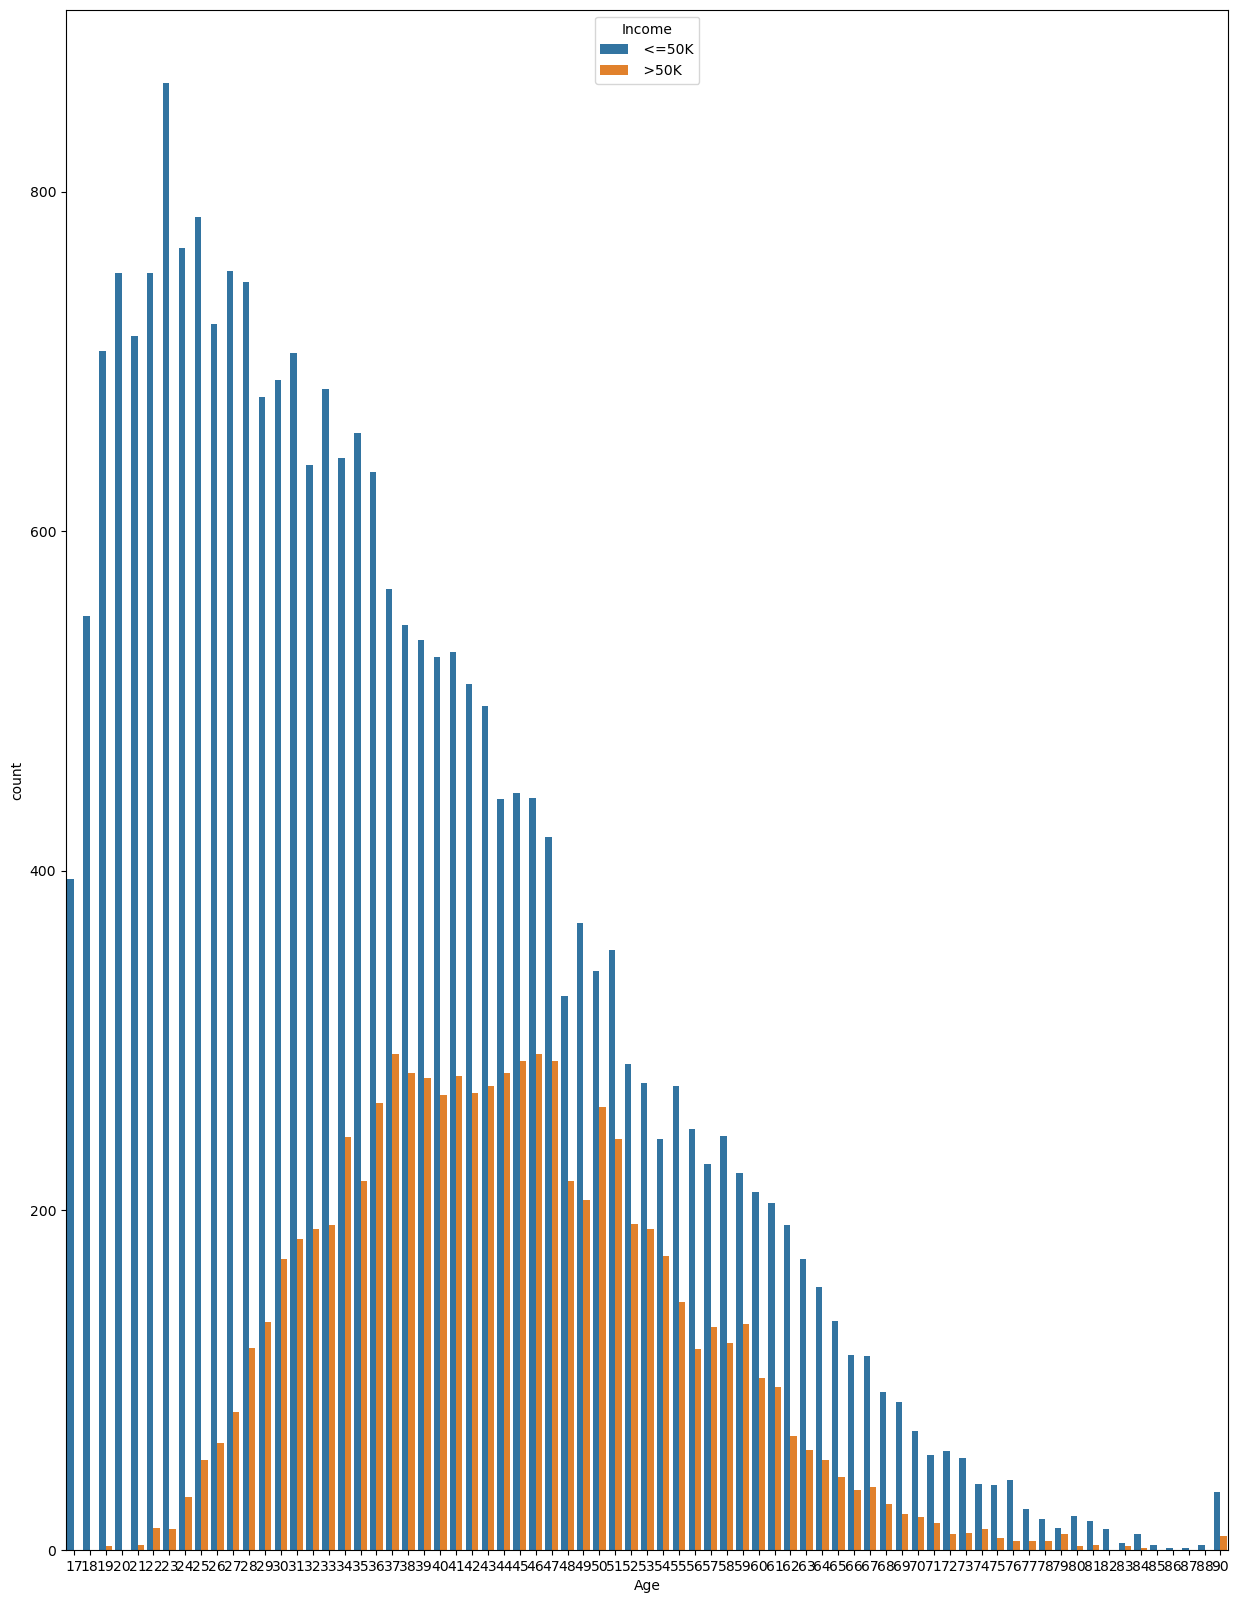

In [16]:
plt.figure(figsize=(15, 20))
sns.countplot(x='Age', hue='Income', data=data)

In [17]:
# Defining function to create new columns to classify people according different age gruop
def age_group(x):
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'
    
data['age_group']=data['Age'].apply(age_group)
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


In [18]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


<AxesSubplot:xlabel='age_group', ylabel='count'>

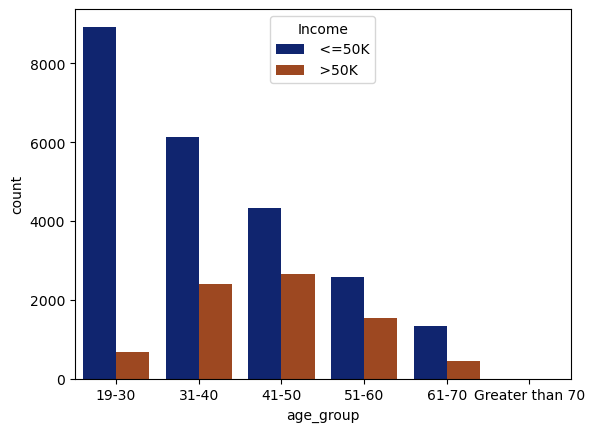

In [19]:
sequence=['19-30', '31-40', '41-50','51-60', '61-70', 'Greater than 70'] 
sns.countplot(data['age_group'], hue=data['Income'],  palette='dark', order=sequence)

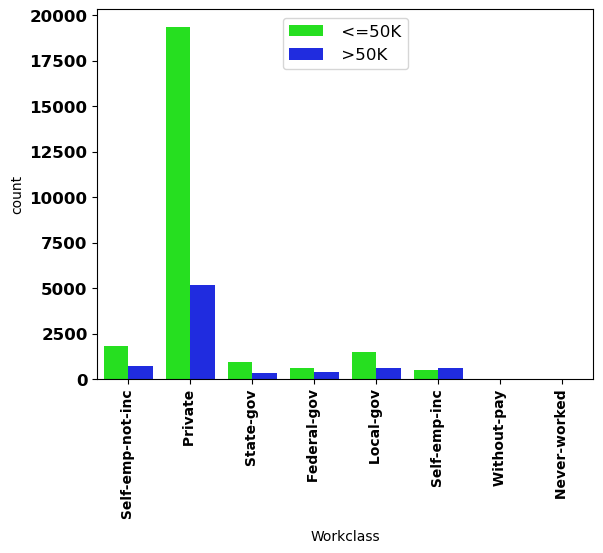

In [20]:
sns.countplot(data['Workclass'], hue=data['Income'], palette='hsv')
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()


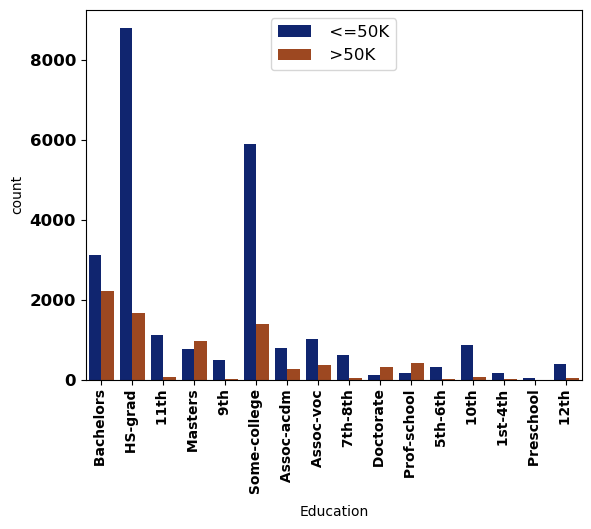

In [21]:
sns.countplot(data['Education'], hue=data['Income'], palette='dark')
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()

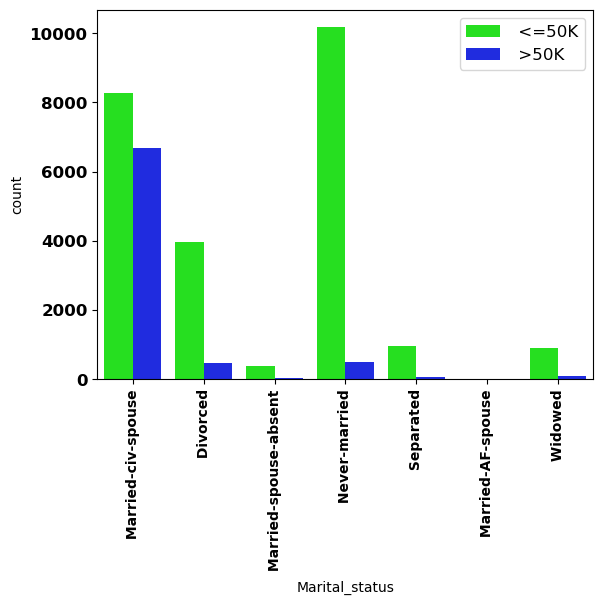

In [22]:
sns.countplot(data['Marital_status'], hue=data['Income'], palette='hsv')
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()

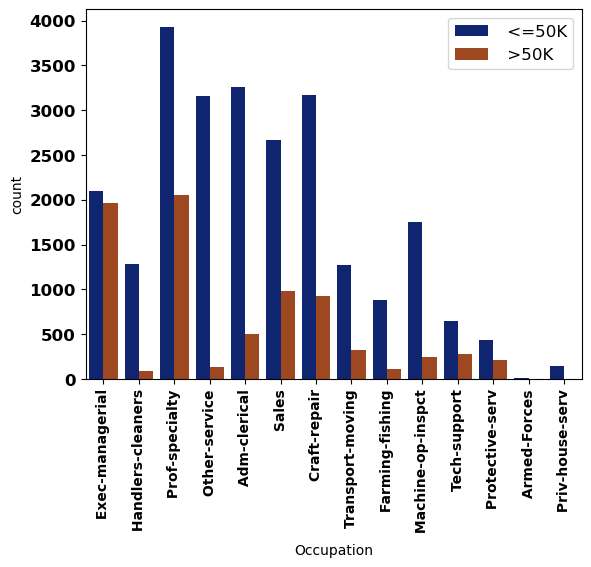

In [23]:
sns.countplot(data['Occupation'], hue=data['Income'], palette='dark')
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()

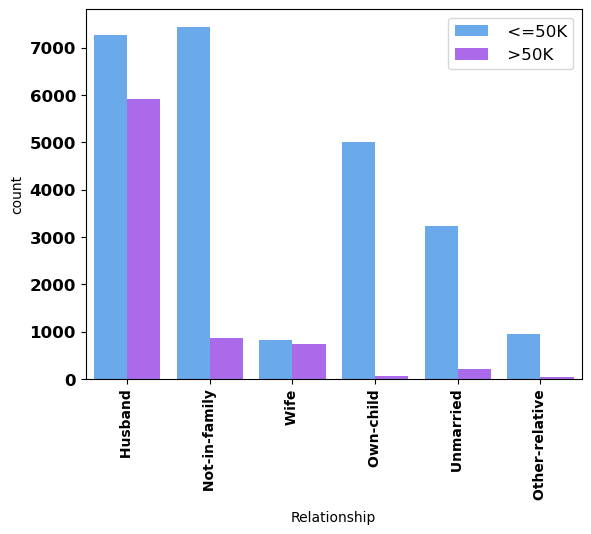

In [24]:
sns.countplot(data['Relationship'], hue=data['Income'], palette='cool')
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()

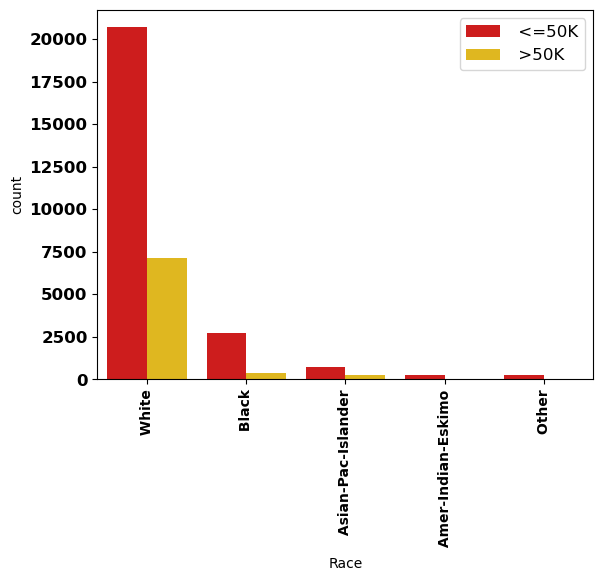

In [25]:
sns.countplot(data['Race'], hue=data['Income'], palette='hot')
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()

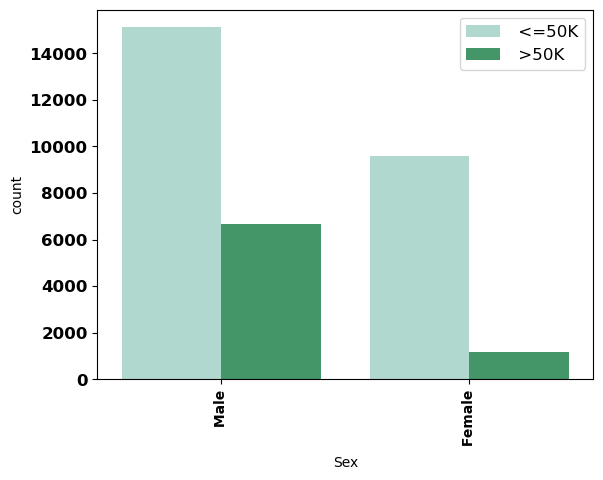

In [26]:
sns.countplot(data['Sex'], hue=data['Income'], palette='BuGn')
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()

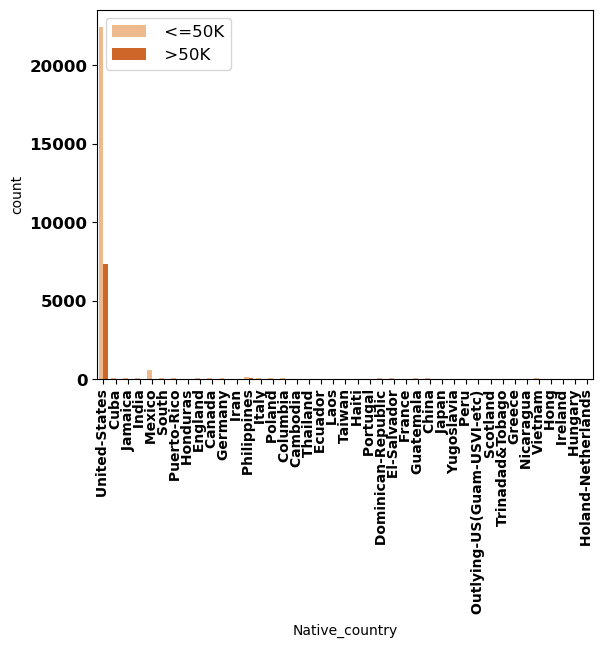

In [27]:
sns.countplot(data['Native_country'], hue=data['Income'], palette='Oranges')
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()

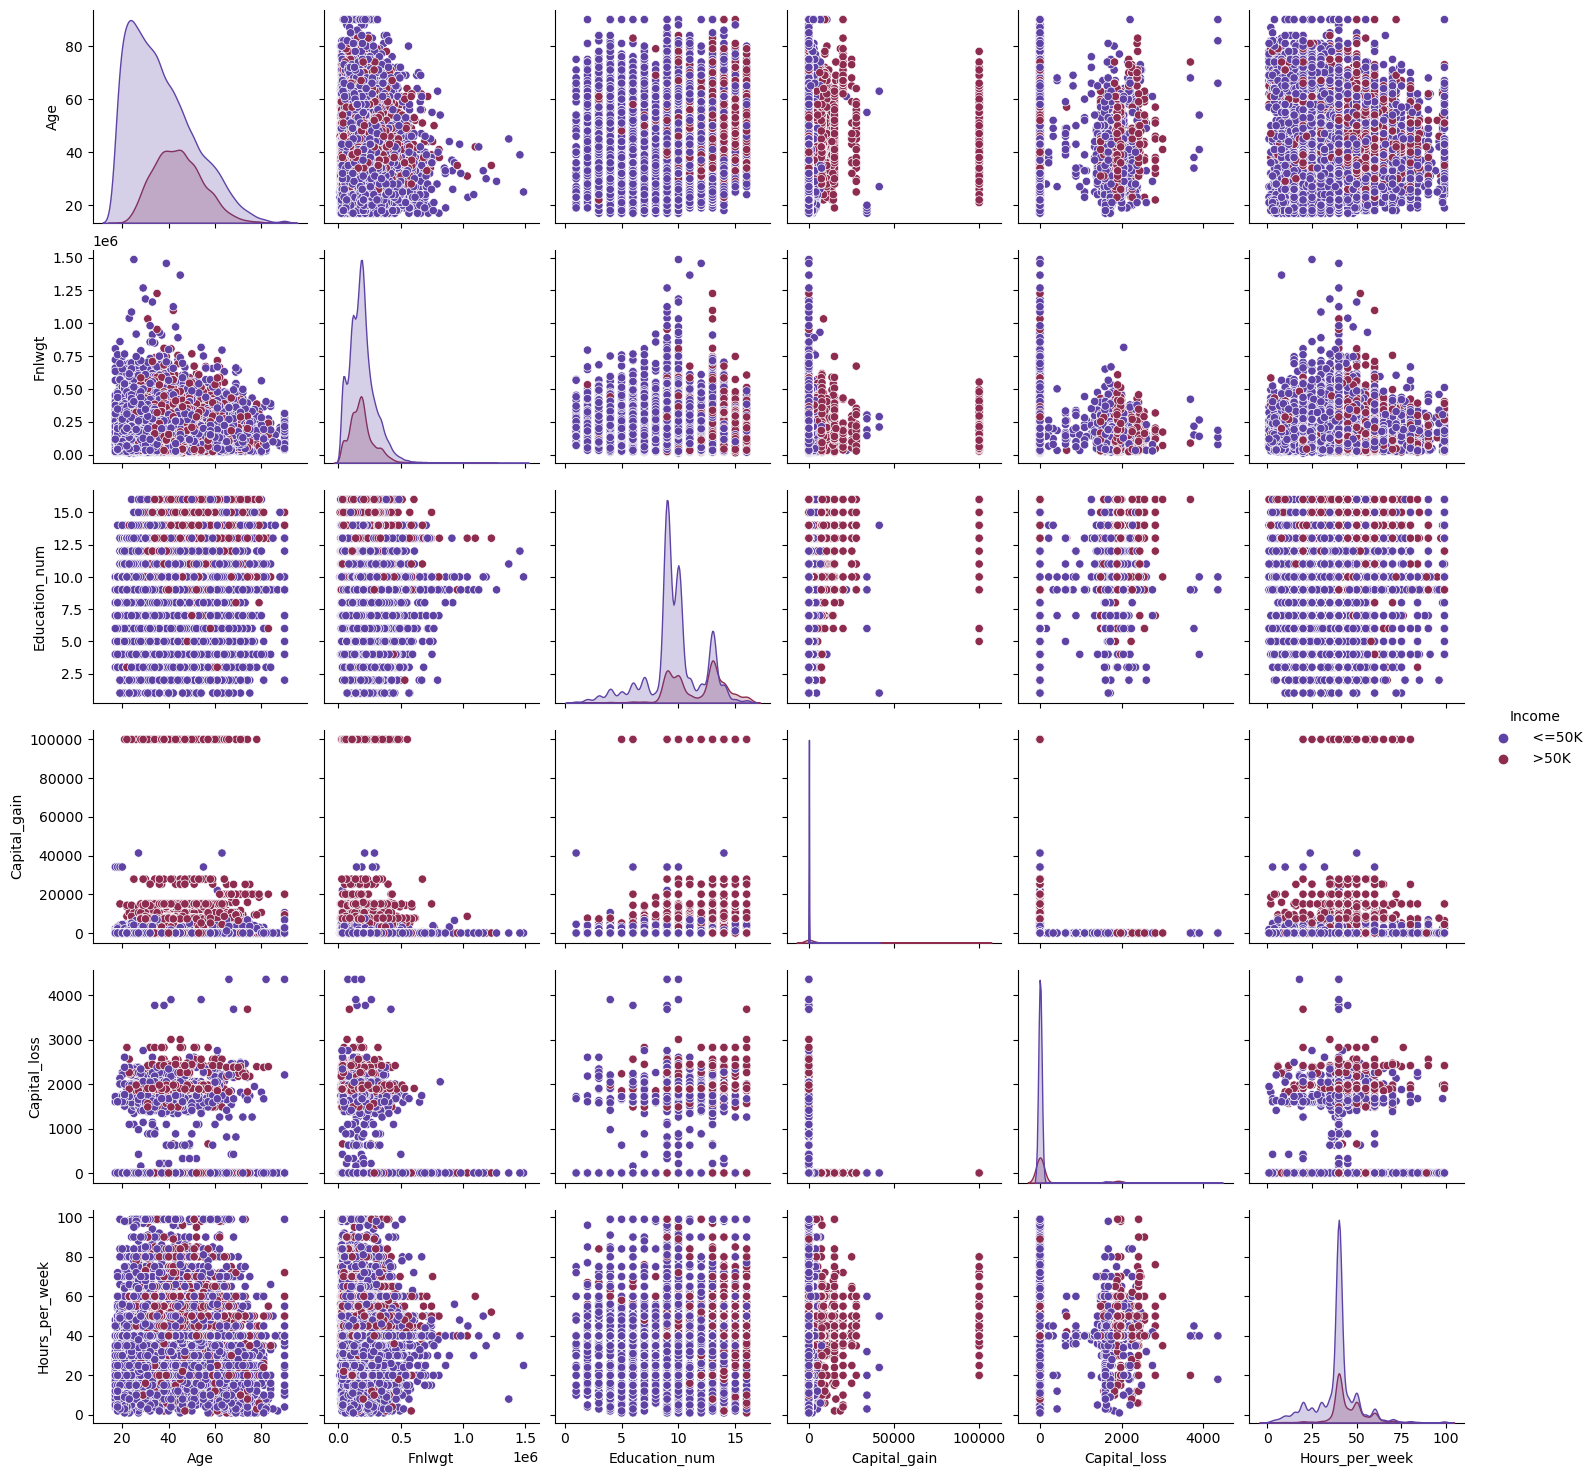

In [28]:
sns.pairplot(data,hue="Income",palette="twilight")

In [29]:
cat_columns=['Workclass','Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat_columns:
    data[i]=le.fit_transform(data[i])
    
data.head()
    

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


In [31]:
data.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,-0.076448,-0.010551,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,-0.024189,0.004852,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Fnlwgt,-0.076448,-0.024189,1.000000,-0.028065,-0.043353,0.028154,-0.000073,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.063073,-0.009521
Education,-0.010551,0.004852,-0.028065,1.000000,0.359105,-0.038413,-0.041258,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.075498,0.079361
Education_num,0.036224,0.003412,-0.043353,0.359105,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299
Marital_status,-0.266142,-0.020506,0.028154,-0.038413,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,-0.000073,-0.041258,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,0.008859,-0.011060,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,-0.021484,0.014307,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.027113,-0.027426,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984


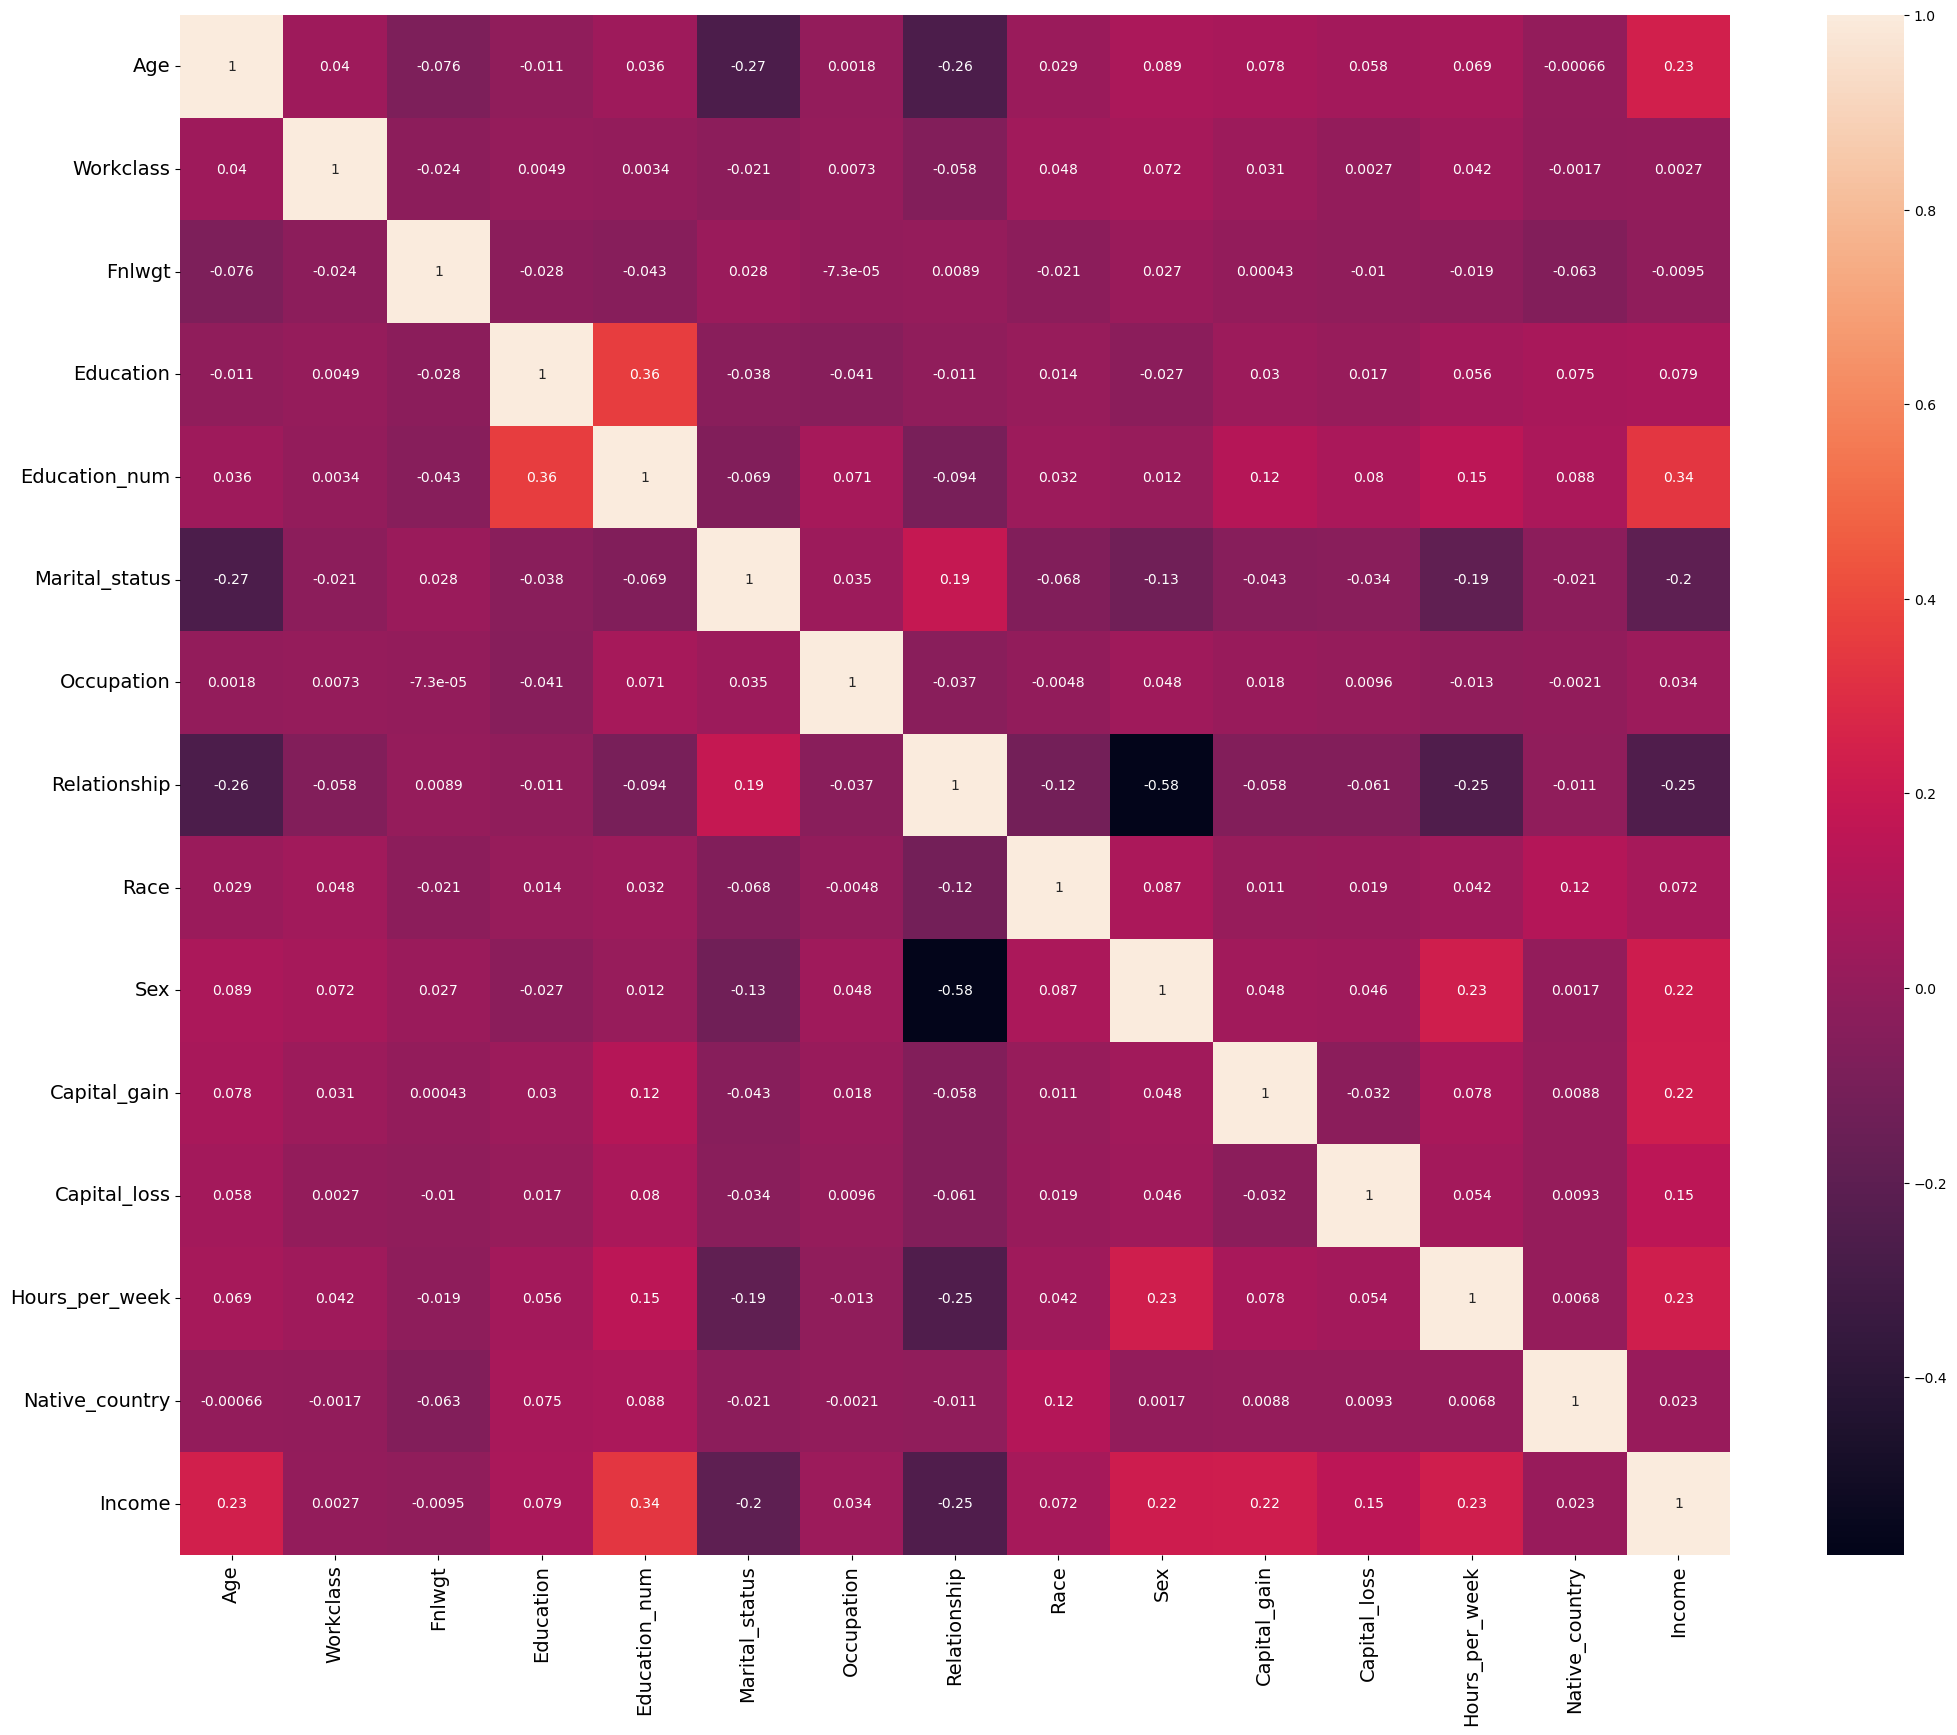

In [32]:
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [33]:
X = data.drop(['Income', 'age_group'], axis =1)
y = data['Income']

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26028, 14) (6508, 14) (26028,) (6508,)


In [35]:
max_acc=0
best_ran_st=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>max_acc:
        max_acc=acc
        best_ran_st=i
        
print(max_acc ,best_ran_st)

0.8149969268592502 210


In [36]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=210)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26028, 14) (6508, 14) (26028,) (6508,)


# LOGISTIC REGRESSION

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred=logreg.predict(X_test)
logreg_acc_score = accuracy_score(y_test, logreg_pred)
logreg_f1_score = f1_score(y_test, logreg_pred)
logreg_con_mat=confusion_matrix(y_test, logreg_pred)
logreg_cl_report=classification_report(y_test, logreg_pred)
logreg_cv_score = cross_val_score(logreg, X, y, cv =5)
logreg_mean_cv_score=logreg_cv_score.mean()
print(logreg_acc_score )
print(logreg_f1_score )
print(logreg_con_mat)
print(logreg_cl_report)
print(logreg_mean_cv_score)

0.8149969268592502
0.4098039215686275
[[4886  143]
 [1061  418]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5029
           1       0.75      0.28      0.41      1479

    accuracy                           0.81      6508
   macro avg       0.78      0.63      0.65      6508
weighted avg       0.80      0.81      0.78      6508

0.7920150433238697


# Random Forest Classifier

In [38]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
rfc_acc_score=accuracy_score(y_test, rfc_pred)
rfc_con_mat=confusion_matrix(y_test, rfc_pred)
rfc_cl_report=classification_report(y_test, rfc_pred)
rfc_cv_score = cross_val_score(rfc, X, y, cv =5)
rfc_f1_score = f1_score(y_test, rfc_pred)
rfc_mean_cv_score=rfc_cv_score.mean()
print(rfc_acc_score)
print(rfc_f1_score)
print(rfc_mean_cv_score)
print(rfc_con_mat)
print(rfc_cl_report)

0.8640135218192994
0.6773605541378053
0.8568355491400732
[[4694  335]
 [ 550  929]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      5029
           1       0.73      0.63      0.68      1479

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.80      6508
weighted avg       0.86      0.86      0.86      6508



# Decision Tree Classifier

In [39]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred=dtc.predict(X_test)
dtc_acc_score = accuracy_score(y_test, dtc_pred)
dtc_con_mat=confusion_matrix(y_test, dtc_pred)
dtc_cl_report=classification_report(y_test, dtc_pred)
dtc_cv_score = cross_val_score(dtc, X, y, cv =5)
dtc_f1_score = f1_score(y_test, dtc_pred)
dtc_mean_cv_score=dtc_cv_score.mean()
print(dtc_acc_score)
print(dtc_f1_score)
print(dtc_mean_cv_score)
print(dtc_con_mat)
print(dtc_cl_report)

0.8225261216963737
0.6246343841403965
0.8070138262524524
[[4392  637]
 [ 518  961]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5029
           1       0.60      0.65      0.62      1479

    accuracy                           0.82      6508
   macro avg       0.75      0.76      0.75      6508
weighted avg       0.83      0.82      0.82      6508



# Gradient Boosting Classifier

In [40]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred=gbc.predict(X_test)
gbc_acc_score = accuracy_score(y_test, gbc_pred)
gbc_con_mat=confusion_matrix(y_test, gbc_pred)
gbc_cl_report=classification_report(y_test, gbc_pred)
gbc_cv_score = cross_val_score(gbc, X, y, cv =5)
gbc_f1_score = f1_score(y_test, gbc_pred)
gbc_mean_cv_score=gbc_cv_score.mean()
print(gbc_acc_score)
print(gbc_f1_score)
print(gbc_mean_cv_score)
print(gbc_con_mat)
print(gbc_cl_report)

0.8733866011063307
0.6918474195961106
0.8630748796931751
[[4759  270]
 [ 554  925]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5029
           1       0.77      0.63      0.69      1479

    accuracy                           0.87      6508
   macro avg       0.83      0.79      0.81      6508
weighted avg       0.87      0.87      0.87      6508



# GAUSSIAN NAIVE BAYES

In [41]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred=gnb.predict(X_test)
gnb_acc_score = accuracy_score(y_test, gnb_pred)
gnb_con_mat=confusion_matrix(y_test, gnb_pred)
gnb_cl_report=classification_report(y_test, gnb_pred)
gnb_cv_score = cross_val_score(gnb, X, y, cv =5)
gnb_f1_score = f1_score(y_test, gnb_pred)
gnb_mean_cv_score=gnb_cv_score.mean()
print(gnb_acc_score)
print(gnb_f1_score)
print(gnb_mean_cv_score)
print(gnb_con_mat)
print(gnb_cl_report)

0.81100184388445
0.44544634806131655
0.7954881315937099
[[4784  245]
 [ 985  494]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5029
           1       0.67      0.33      0.45      1479

    accuracy                           0.81      6508
   macro avg       0.75      0.64      0.67      6508
weighted avg       0.79      0.81      0.79      6508



# SUPPORT VECTOR 

In [42]:
svm=SVC()
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)
svm_acc_score = accuracy_score(y_test, svm_pred)
svm_con_mat=confusion_matrix(y_test, svm_pred)
svm_cl_report=classification_report(y_test, svm_pred)
svm_cv_score = cross_val_score(svm, X, y, cv =5)
svm_f1_score = f1_score(y_test, svm_pred)
svm_mean_cv_score=svm_cv_score.mean()
print(svm_acc_score)
print(svm_f1_score)
print(svm_mean_cv_score)
print(svm_con_mat)
print(svm_cl_report)

0.8088506453595574
0.27674418604651163
0.7951192366331601
[[5026    3]
 [1241  238]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5029
           1       0.99      0.16      0.28      1479

    accuracy                           0.81      6508
   macro avg       0.89      0.58      0.58      6508
weighted avg       0.84      0.81      0.75      6508



# STOCHASTIC GRADIENT CLASSIFIER

In [43]:
sgd=SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred=sgd.predict(X_test)
sgd_acc_score = accuracy_score(y_test, sgd_pred)
sgd_con_mat=confusion_matrix(y_test, sgd_pred)
sgd_cl_report=classification_report(y_test, sgd_pred)
sgd_cv_score = cross_val_score(sgd, X, y, cv =5)
sgd_f1_score = f1_score(y_test, sgd_pred)
sgd_mean_cv_score=sgd_cv_score.mean()
print(sgd_acc_score)
print(sgd_f1_score)
print(sgd_mean_cv_score)
print(sgd_con_mat)
print(sgd_cl_report)

0.22725875845113705
0.3703518217102792
0.7848843886055668
[[   0 5029]
 [   0 1479]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5029
           1       0.23      1.00      0.37      1479

    accuracy                           0.23      6508
   macro avg       0.11      0.50      0.19      6508
weighted avg       0.05      0.23      0.08      6508



# Ada Boost Classifier

In [44]:
adc=AdaBoostClassifier()
adc.fit(X_train, y_train)
adc_pred=adc.predict(X_test)
adc_acc_score = accuracy_score(y_test, adc_pred)
adc_con_mat=confusion_matrix(y_test, adc_pred)
adc_cl_report=classification_report(y_test, adc_pred)
adc_cv_score = cross_val_score(adc, X, y, cv =5)
adc_f1_score = f1_score(y_test, adc_pred)
adc_mean_cv_score=adc_cv_score.mean()
print(adc_acc_score)
print(adc_f1_score)
print(adc_mean_cv_score)
print(adc_con_mat)
print(adc_cl_report)

0.8690842040565457
0.6813762154076289
0.8593867187990731
[[4745  284]
 [ 568  911]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      5029
           1       0.76      0.62      0.68      1479

    accuracy                           0.87      6508
   macro avg       0.83      0.78      0.80      6508
weighted avg       0.86      0.87      0.86      6508



In [45]:
model_pf=pd.DataFrame({'Models':['Logistic Regression', 'Random Forest Classifier', 'Decision Tree', 'Gradient Boosting Classifier', 'Gaussian Naive Bayes Classifier', 'Support Vector Classifier', 'Stochastic Gradient Descent', 'AdaBoost Classifier'], 'Accuracy Score' : [logreg_acc_score, rfc_acc_score,  dtc_acc_score, gbc_acc_score, gnb_acc_score, svm_acc_score, sgd_acc_score, adc_acc_score], 'CV Score' : [logreg_mean_cv_score, rfc_mean_cv_score,  dtc_mean_cv_score, gbc_mean_cv_score, gnb_mean_cv_score, svm_mean_cv_score, sgd_mean_cv_score, adc_mean_cv_score]})
model_pf

,Models,Accuracy Score,CV Score
0,Logistic Regression,0.814997,0.792015
1,Random Forest Classifier,0.864014,0.856836
2,Decision Tree,0.822526,0.807014
3,Gradient Boosting Classifier,0.873387,0.863075
4,Gaussian Naive Bayes Classifier,0.811002,0.795488
5,Support Vector Classifier,0.808851,0.795119
6,Stochastic Gradient Descent,0.227259,0.784884
7,AdaBoost Classifier,0.869084,0.859387


In [46]:
#Gradient Boosting Classifier is the best model for prediction of income